## Import libs

In [255]:
import os
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy as sp
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
from itertools import groupby
from operator import itemgetter
import matplotlib as mpl
import bootstrap_contrast as bs
from nptdms import *
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 1000)
mpl.rcParams['pdf.fonttype'] = 42

## Read tdms files

In [256]:
# TdmsFile > Groups > Channels > Data 
f = TdmsFile("LOG_2017-04-18_16-22-19.tdms")

## Inspect the file

In [257]:
## Print group names
groupNames = f.groups()
print 'Group Names:', groupNames

Group Names: [u'ExperimentInfo', u'Tracker', u'UserComments', u'ExperimentLog', u'MFC', u'Count', u'AnalogueInputs', u'ErrorCodes']


In [258]:
## Print channel names of a particular group
channelNames = f.group_channels('Tracker')
print 'Trackers channels:', channelNames

Trackers channels: [<TdmsObject with path /'Tracker'/'FrameStamp'>, <TdmsObject with path /'Tracker'/'Timestamp'>, <TdmsObject with path /'Tracker'/'Untitled'>, <TdmsObject with path /'Tracker'/'Untitled 1'>, <TdmsObject with path /'Tracker'/'Untitled 2'>, <TdmsObject with path /'Tracker'/'Untitled 3'>, <TdmsObject with path /'Tracker'/'Untitled 4'>, <TdmsObject with path /'Tracker'/'Untitled 5'>, <TdmsObject with path /'Tracker'/'Untitled 6'>, <TdmsObject with path /'Tracker'/'Untitled 7'>, <TdmsObject with path /'Tracker'/'Untitled 8'>, <TdmsObject with path /'Tracker'/'Untitled 9'>, <TdmsObject with path /'Tracker'/'Untitled 10'>, <TdmsObject with path /'Tracker'/'Untitled 11'>, <TdmsObject with path /'Tracker'/'Untitled 12'>, <TdmsObject with path /'Tracker'/'Untitled 13'>, <TdmsObject with path /'Tracker'/'Untitled 14'>, <TdmsObject with path /'Tracker'/'Untitled 15'>, <TdmsObject with path /'Tracker'/'Untitled 16'>, <TdmsObject with path /'Tracker'/'Untitled 17'>, <TdmsObject wit

In [259]:
for group in groupNames:
    channelNames = f.group_channels(group)
    for item in channelNames:
        print 'Group Name/Channel Name:',item

Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'ID'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Genotype'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Sex'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Temperature'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Air'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Intensity'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Light Status'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'FrameStamp'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Timestamp'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled 1'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled 2'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled 3'>
Group Name/Channel Name: <TdmsObject wit

Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec005'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec006'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec007'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec008'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec009'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec010'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec011'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec012'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec013'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec014'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec015'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Vx_Av_mm_per_sec016'>
Group Name/Channel Name: <Td

## Access to the data alternative 1

In [15]:
## Get the data from a channel
Genotype = f.channel_data('ExperimentInfo','Genotype')
Tracking = f.channel_data('Tracker','Untitled 1')

print 'Genotype:', Genotype
print 'Tracker(cXmm001):', Tracking
print 'Length of the cXmm data:', len(Tracking)

Genotype: [u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson', u'Or59c-Gal4-UAS-CsChrimson']
Tracker(cXmm001): [0 0 0 ..., 0 0 0]
Length of the cXmm data: 3047


## Access to the data alternative 2

In [260]:
## Get the data from a channel 2
channel = f.object('Tracker','Speed_Av_mm_per_sec001')
data = channel.data
#time = channel.time_track()

In [264]:
channel1 = f.object('Count','PatternState')
data1 = channel1.data  

In [276]:
channel1 = f.object('Count','Timestamp')
data1 = channel1.data 

## Transfer the data into a Pandas df

In [403]:
## Loading data into a Pandas Df
df = f.as_dataframe()
#df
#df.to_csv('tdmsfile2.csv')

## Get the light ON/OFF information

In [254]:
f.object().properties

OrderedDict([(u'Start_Time',
              datetime.datetime(2017, 4, 18, 8, 22, 19, 578975, tzinfo=<UTC>)),
             (u'End_Time',
              datetime.datetime(2017, 4, 18, 8, 25, 19, 534969, tzinfo=<UTC>)),
             (u'Num_Enabled_ROI', 52),
             (u'Num_Missed_Frames_VideoIn', 0),
             (u'Num_Missed_Frames_Tracker', 0),
             (u'Num_Missed_Frames_Unstable', 0),
             (u'Num_Missed_Frames_Logger', 0),
             (u'Num_Missed_Frames_VideoRec', 0),
             (u'Num_Events', 0),
             (u'Num_Logged_Frames', 3046),
             (u'X_mm_per_pixel', 0.36500000953674316),
             (u'Y_mm_per_pixel', 0.36500000953674316)])

In [400]:
data1 = df["/\'Count\'/\'Obj1_cX\'"]

In [384]:
data3 = df["/'Tracker'/'HeadX_pix001'"]

In [401]:
#data1.isnull().sum()
data1

0       12.510 
1       12.510 
2       12.510 
3       12.510 
4       12.510 
5       12.510 
6       12.510 
7       12.510 
8       12.510 
9       12.510 
10      12.510 
11      12.510 
12      12.510 
13      12.510 
14      12.510 
15      12.510 
16      12.510 
17      12.510 
18      12.510 
19      12.510 
20      12.510 
21      12.510 
22      12.510 
23      12.510 
24      12.510 
25      12.510 
26      12.510 
27      12.510 
28      12.510 
29      12.510 
30      12.510 
31      12.510 
32      12.510 
33      12.510 
34      12.510 
35      12.510 
36      12.510 
37      12.510 
38      12.510 
39      12.510 
40      12.510 
41      12.510 
42      12.510 
43      12.510 
44      12.510 
45      12.510 
46      12.510 
47      12.510 
48      12.510 
49      12.510 
50      12.510 
51      12.510 
52      12.510 
53      12.510 
54      12.510 
55      12.510 
56      12.510 
57      12.510 
58      12.510 
59      12.510 
60      12.510 
61      12.510 
62      

In [380]:
t = "/'Tracker'/'HeadX_pix001'"
"/'Tracker'/'HeadX_pix001"

In [381]:
data2 = df[t]

In [360]:
patterns = df["/\'Count\'/\'PatternState'"]

In [371]:
pat01 = patterns[patterns == 'Pattern 01'].index
pat10 = patterns[patterns == 'Pattern 10'].index

p01_min = min(pat01)
p01_max = max(pat01)
p10_min = min(pat10)
p10_max = max(pat10)

In [433]:
p01_min

502

In [379]:
pat01_first_light_exposure = min(df["/\'Count\'/\'Obj1_InLight'"][p01_min:p01_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].index) if not df["/\'Count\'/\'Obj1_InLight'"][p01_min:p01_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].empty else 0
pat10_first_light_exposure = min(df["/\'Count\'/\'Obj1_InLight'"][p10_min:p10_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].index) if not df["/\'Count\'/\'Obj1_InLight'"][p10_min:p10_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].empty else 0

In [459]:
pat10_first_light_exposure

1772

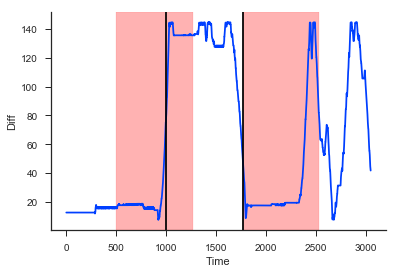

In [382]:
fig1 = plt.figure()
ax1 = plt.subplot(111)

sns.set(style="ticks", palette="bright", color_codes=True)
sns.despine()
ax1.set_ylabel('Diff')
ax1.set_xlabel('Time')

ax1.plot(range(len(data2)), data2)
ax1.axvspan(p10_min,p10_max,color='red',alpha=0.3)
ax1.axvspan(p01_min,p01_max,color='red',alpha=0.3)
ax1.axvline(pat01_first_light_exposure,color='black')
ax1.axvline(pat10_first_light_exposure,color='black')
#ax1.plot(range(len(data2)), data2,color='red')
#plt.savefig('HeadX_vs_Cx.pdf',dpi=1000,bbox_inches='tight')
plt.show()

In [392]:
diff = [abs(float(x) - float(y)) for x, y in zip(data1, data3)]

In [487]:
#d = df.filter(regex= "/'Tracker'/'HeadX_pix")
sum(df.columns.str.contains("/'Tracker'/'HeadX_pix"))

52

In [515]:
##Get the chunks where light is ON   
df_pat01 = df[df["/\'Count\'/\'PatternState'"] == 'Pattern 01']    
df_pat10 = df[df["/\'Count\'/\'PatternState'"] == 'Pattern 10'] 

##Check number of flies in the df
num_of_flies = sum(df.columns.str.contains("/'Tracker'/'HeadX_pix"))

temp = {'FlyID':[],'Pattern 01 First light contact index':[],'Pattern 10 First light contact index':[]}
for fly in range(1,num_of_flies+1):
    ## format the fly index into 3 digits number,i.e '5' >> '005' 
    flyID = format(str(fly).zfill(3))
    
    ## generate IDs for the data need to be accessed from the df
    fly_headX_pix_ID = "/'Tracker'/'HeadX_pix" + str(flyID) + "'"
    fly_inLight_ID = "/\'Count\'/\'Obj%s_InLight'" % fly
    
    ## find the index where the fly first contacted with light in each pattern
    pat01_first_light_contact = df_pat01.index[df_pat01[fly_inLight_ID] == '1'][0] if not df_pat01.index[df_pat01[fly_inLight_ID] == '1'].empty else None 
    pat10_first_light_contact = df_pat10.index[df_pat10[fly_inLight_ID] == '1'][0] if not df_pat10.index[df_pat10[fly_inLight_ID] == '1'].empty else None 
    
    temp['FlyID'].append(flyID)
    temp['Pattern 01 First light contact index'].append(pat01_first_light_contact)
    temp['Pattern 10 First light contact index'].append(pat10_first_light_contact)

results = pd.DataFrame(temp)

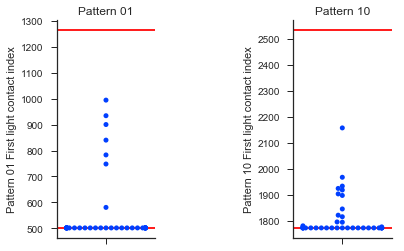

Never seen the light (Pat01) = 16 Never seen the light (Pat10) = 14


In [574]:
## Plotting first time contacts of the flies in a given experiment

## Number of flies that never exposed to the light

no_contact_w_light_pat01 = sum(results['Pattern 01 First light contact index'].isnull())
no_contact_w_light_pat10 =sum(results['Pattern 10 First light contact index'].isnull())

## Light start-end indices
pat01_start = df_pat01.index[0]
pat01_end = df_pat01.index[-1]
pat10_start = df_pat10.index[0]
pat10_end = df_pat10.index[-1]

fig1 = plt.figure()
ax1 = plt.subplot(131)
ax2 = plt.subplot(133)

sns.set(style="ticks", palette="bright", color_codes=True)
sns.despine()
#ax1.set_ylabel('First light contact')
#ax1.set_xlabel('Time')

sns.swarmplot(y = 'Pattern 01 First light contact index', data=results,ax = ax1)
sns.swarmplot(y = 'Pattern 10 First light contact index', data=results,ax = ax2)
#ax1.boxplot(results['Pattern 01 First light contact index'])
#ax1.axvspan(p10_min,p10_max,color='red',alpha=0.3)
#ax1.axvspan(p01_min,p01_max,color='red',alpha=0.3)
ax1.axhline(pat01_start,color='red')
ax1.axhline(pat01_end,color='red')
ax2.axhline(pat10_start,color='red')
ax2.axhline(pat10_end,color='red')
ax1.set_title('Pattern 01')
ax2.set_title('Pattern 10')
#ax1.plot(range(len(data2)), data2,color='red')
#plt.savefig('HeadX_vs_Cx.pdf',dpi=1000,bbox_inches='tight')
plt.show()
print 'Never seen the light (Pat01) =',no_contact_w_light_pat01, 'Never seen the light (Pat10) =',no_contact_w_light_pat10 

In [575]:
results

,FlyID,Pattern 01 First light contact index,Pattern 10 First light contact index
0,001,994.0,1772.0
1,002,NaN,1772.0
2,003,502.0,NaN
3,004,502.0,1772.0
4,005,502.0,1776.0
5,006,NaN,1772.0
6,007,502.0,NaN
7,008,502.0,1780.0
8,009,NaN,1772.0
9,010,NaN,1918.0


### Set your data folder 

In [40]:
folder = "C:/Users/tumkayat/Desktop/ORScreening/OSAR/Orco-ACR1-Male-starved/"
os.chdir(folder)

### Can check how many .csv files is located under the folder

In [41]:
dataFiles = os.listdir(folder)
len(dataFiles)

24

### Set how many last seconds you want to use for the analysis

In [42]:
lastXseconds = 30

### Run this cell to do the analysis

In [43]:
def calculatePI(data):
    numofTimePoints = len(data)
    totalTimeinLight = sum(data)
    totalTimeinDark = numofTimePoints - totalTimeinLight
    
    PI = float(totalTimeinLight - totalTimeinDark)/float(numofTimePoints)
    return PI

def splitDataintoEpochChunks(df):
    return np.split(lightON, np.where(np.diff(lightON.index.second) > 1)[0]+1)

temp = {'FileName':[], 'Pattern':[], 'FileName_pattern':[],'Date':[], 'StartTime':[], 'Genotype': [],'Status':[],'Status_Intensity': [], 'Intensity':[], 'LightType':[],
        'LightType_Intensity':[] ,'Intensity_Wind': [],'Wind': [],'LightType_Intensity_Wind':[],'Status_LightType_Intensity_Wind': [], 'SingleFlyPI':[], 'Half PI': []}


for f in dataFiles:
    if f[-4:] == '.csv':
        print f
        expInfo = f.split('_')
        #print expInfo
        date = expInfo[1]
        #startTime = expInfo[-5]
        #genotype = expInfo[-4]
        #intensity = expInfo[-3]
        #lightType = expInfo[-2]
        #windState = expInfo[-1][:-4]
        
        startTime = expInfo[2]
        genotype = expInfo[3]
        intensity = expInfo[4][3:]
        lightType = "Constant"
        windState = "NoAir"
        
        
        if 'w1118' in genotype:
            status = 'Parent'
        else:
            status = 'Offspring'
            
        df = pd.read_csv(f)
        timeIndex = pd.to_datetime(df['Time'])
        df = df.drop(['Time'], axis=1)
        df.index = (timeIndex)
        
        lightON = df[df['PatternState'] != 'Pattern 00']
        chunks = splitDataintoEpochChunks(lightON)
        
        for chunk in chunks:
            pattern = chunk['PatternState'][0]        
            
            lastTimePointofTheChunk = chunk.index[-1]            
            epoch = lastTimePointofTheChunk - dt.timedelta(seconds=lastXseconds)
            
            dataOfInterest = chunk.between_time(start_time=epoch.time(), end_time=lastTimePointofTheChunk.time())
            halfPI = dataOfInterest['LightPI'].mean()
            
            singleFlyData = dataOfInterest.filter(regex='_InLight')
            
            for col in singleFlyData:
                sfd = singleFlyData[col]
                sfPI = calculatePI(sfd)          
                
                temp['FileName'].append(f)
                temp['Pattern'].append(pattern)
                temp['FileName_pattern'].append(f + '_' + pattern)
                temp['Date'].append(date)
                temp['StartTime'].append(startTime)
                temp['Genotype'].append(genotype)
                temp['Status'].append(status)
                temp['Intensity'].append(intensity)
                temp['Status_Intensity'].append(status + '_' + intensity)
                temp['LightType'].append(lightType)
                temp['Wind'].append(windState)
                temp['Half PI'].append(halfPI)
                temp['SingleFlyPI'].append(sfPI)
                temp['LightType_Intensity'].append(lightType + '_' + intensity)
                temp['Intensity_Wind'].append(intensity + '_' + windState)
                temp['LightType_Intensity_Wind'].append(lightType + '_' + intensity + '_' + windState)
                temp['Status_LightType_Intensity_Wind'].append(status + '_' + lightType + '_' + intensity + '_' + windState)

results = pd.DataFrame(temp, columns=['FileName','Pattern', 'FileName_pattern', 'Date', 'StartTime', 'Genotype','Status', 'Intensity','LightType', 'Wind','LightType_Intensity','Intensity_Wind','Status_Intensity','LightType_Intensity_Wind','Status_LightType_Intensity_Wind','SingleFlyPI', 'Half PI'])
#upWind = results[results['Pattern'] == 'Pattern 10']
#downWind = results[results['Pattern'] == 'Pattern 01']



CountLog_2017-01-25_09-33-00_w1118-UAS-dGtACR1_(1)EighthGreen_.csv
CountLog_2017-01-25_09-36-20_w1118-UAS-dGtACR1_(2)QuarterGreen_.csv
CountLog_2017-01-25_09-39-25_w1118-UAS-dGtACR1_(3)HalfGreen_.csv
CountLog_2017-01-25_09-42-33_w1118-UAS-dGtACR1_(4)FullGreen_.csv
CountLog_2017-01-25_09-49-02_Orco-Gal4-UAS-dGtACR1_(1)EighthGreen_.csv
CountLog_2017-01-25_09-52-29_Orco-Gal4-UAS-dGtACR1_(2)QuarterGreen_.csv
CountLog_2017-01-25_09-56-07_Orco-Gal4-UAS-dGtACR1_(3)HalfGreen_.csv
CountLog_2017-01-25_09-59-32_Orco-Gal4-UAS-dGtACR1_(4)FullGreen_.csv
CountLog_2017-01-25_10-06-33_w1118-UAS-dGtACR1_(1)EighthGreen_.csv
CountLog_2017-01-25_10-09-56_w1118-UAS-dGtACR1_(2)QuarterGreen_.csv
CountLog_2017-01-25_10-15-14_w1118-UAS-dGtACR1_(3)HalfGreen_.csv
CountLog_2017-01-25_10-18-52_w1118-UAS-dGtACR1_(4)FullGreen_.csv
CountLog_2017-01-25_10-24-52_Orco-Gal4-UAS-dGtACR1_(1)EighthGreen_.csv
CountLog_2017-01-25_10-28-31_Orco-Gal4-UAS-dGtACR1_(2)QuarterGreen_.csv
CountLog_2017-01-25_10-31-42_Orco-Gal4-UAS-dGt

### The analysis (Single fly PI etc.) will be saved as a df called "results". You can display it here.

In [37]:
results

,FileName,Pattern,FileName_pattern,Date,StartTime,Genotype,Status,Intensity,LightType,Wind,LightType_Intensity,Intensity_Wind,Status_Intensity,LightType_Intensity_Wind,Status_LightType_Intensity_Wind,SingleFlyPI,Half PI
0,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,-0.009009,0.015450
1,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,0.030030,0.015450
2,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,0.150150,0.015450
3,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,-0.009009,0.015450
4,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,-0.339339,0.015450
5,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,0.033033,0.015450
6,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,-0.117117,0.015450
7,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,-0.318318,0.015450
8,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,-0.036036,0.015450
9,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,Pattern 01,CountLog_2017-01-25_08-56-08_w1118-UAS-dGtACR1...,2017-01-25,08-56-08,w1118-UAS-dGtACR1,Parent,EighthGreen,Constant,NoAir,Constant_EighthGreen,EighthGreen_NoAir,Parent_EighthGreen,Constant_EighthGreen_NoAir,Parent_Constant_EighthGreen_NoAir,0.165165,0.015450


### To plot the half PIs instead of Single Fly PI, run this cell. Otherwise NOT neccessary.

In [16]:
halfPI = results.drop_duplicates('FileName_pattern')
halfPI = halfPI.drop('SingleFlyPI',1)

,FileName,FileName_pattern,Date,StartTime,Genotype,Status,Intensity,LightType,Wind,LightType_Intensity,Intensity_Wind,Status_Intensity,LightType_Intensity_Wind,Status_LightType_Intensity_Wind,Half PI
0,CountLog_2016-11-15_10-31-40_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-31-40_w1118-UAS-CsChrim...,2016-11-15,10-31-40,w1118-UAS-CsChrimson,Parent,4-65mV,Constant,NoAir,Constant_4-65mV,4-65mV_NoAir,Parent_4-65mV,Constant_4-65mV_NoAir,Parent_Constant_4-65mV_NoAir,-0.051877
16,CountLog_2016-11-15_10-31-40_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-31-40_w1118-UAS-CsChrim...,2016-11-15,10-31-40,w1118-UAS-CsChrimson,Parent,4-65mV,Constant,NoAir,Constant_4-65mV,4-65mV_NoAir,Parent_4-65mV,Constant_4-65mV_NoAir,Parent_Constant_4-65mV_NoAir,-0.028543
32,CountLog_2016-11-15_10-38-30_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-38-30_w1118-UAS-CsChrim...,2016-11-15,10-38-30,w1118-UAS-CsChrimson,Parent,4-65mV,Constant,Air,Constant_4-65mV,4-65mV_Air,Parent_4-65mV,Constant_4-65mV_Air,Parent_Constant_4-65mV_Air,-0.023221
48,CountLog_2016-11-15_10-38-30_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-38-30_w1118-UAS-CsChrim...,2016-11-15,10-38-30,w1118-UAS-CsChrimson,Parent,4-65mV,Constant,Air,Constant_4-65mV,4-65mV_Air,Parent_4-65mV,Constant_4-65mV_Air,Parent_Constant_4-65mV_Air,0.183071
64,CountLog_2016-11-15_10-42-13_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-42-13_w1118-UAS-CsChrim...,2016-11-15,10-42-13,w1118-UAS-CsChrimson,Parent,9-3mV,Pulse,NoAir,Pulse_9-3mV,9-3mV_NoAir,Parent_9-3mV,Pulse_9-3mV_NoAir,Parent_Pulse_9-3mV_NoAir,-0.207837
80,CountLog_2016-11-15_10-42-13_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-42-13_w1118-UAS-CsChrim...,2016-11-15,10-42-13,w1118-UAS-CsChrimson,Parent,9-3mV,Pulse,NoAir,Pulse_9-3mV,9-3mV_NoAir,Parent_9-3mV,Pulse_9-3mV_NoAir,Parent_Pulse_9-3mV_NoAir,-0.296937
96,CountLog_2016-11-15_10-45-39_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-45-39_w1118-UAS-CsChrim...,2016-11-15,10-45-39,w1118-UAS-CsChrimson,Parent,9-3mV,Pulse,Air,Pulse_9-3mV,9-3mV_Air,Parent_9-3mV,Pulse_9-3mV_Air,Parent_Pulse_9-3mV_Air,-0.287055
112,CountLog_2016-11-15_10-45-39_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-45-39_w1118-UAS-CsChrim...,2016-11-15,10-45-39,w1118-UAS-CsChrimson,Parent,9-3mV,Pulse,Air,Pulse_9-3mV,9-3mV_Air,Parent_9-3mV,Pulse_9-3mV_Air,Parent_Pulse_9-3mV_Air,-0.210138
128,CountLog_2016-11-15_10-49-15_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-49-15_w1118-UAS-CsChrim...,2016-11-15,10-49-15,w1118-UAS-CsChrimson,Parent,9-3mV,Constant,NoAir,Constant_9-3mV,9-3mV_NoAir,Parent_9-3mV,Constant_9-3mV_NoAir,Parent_Constant_9-3mV_NoAir,-0.237599
144,CountLog_2016-11-15_10-49-15_w1118-UAS-CsChrim...,CountLog_2016-11-15_10-49-15_w1118-UAS-CsChrim...,2016-11-15,10-49-15,w1118-UAS-CsChrimson,Parent,9-3mV,Constant,NoAir,Constant_9-3mV,9-3mV_NoAir,Parent_9-3mV,Constant_9-3mV_NoAir,Parent_Constant_9-3mV_NoAir,-0.261319


### Can see which genotypes there are in the analysis, and assign color to them for the plots

In [44]:
print results['Genotype'].unique()
myPal = {#results['Genotype'].unique()[0] : 'cyan',
        results['Genotype'].unique()[0] : 'lightgreen',
        results['Genotype'].unique()[1] : 'red'}

['w1118-UAS-dGtACR1' 'Orco-Gal4-UAS-dGtACR1']


### Can check the experimental conditions and use the ones you want to compare as "idx" in the next cells

In [16]:
results['Status_LightType_Intensity_Wind'].unique()

array(['Offspring_Constant_EighthGreen_NoAir',
       'Offspring_Constant_QuarterGreen_NoAir',
       'Offspring_Constant_HalfGreen_NoAir',
       'Offspring_Constant_FullGreen_NoAir',
       'Parent_Constant_EighthGreen_NoAir',
       'Parent_Constant_QuarterGreen_NoAir',
       'Parent_Constant_HalfGreen_NoAir', 'Parent_Constant_FullGreen_NoAir'], dtype=object)

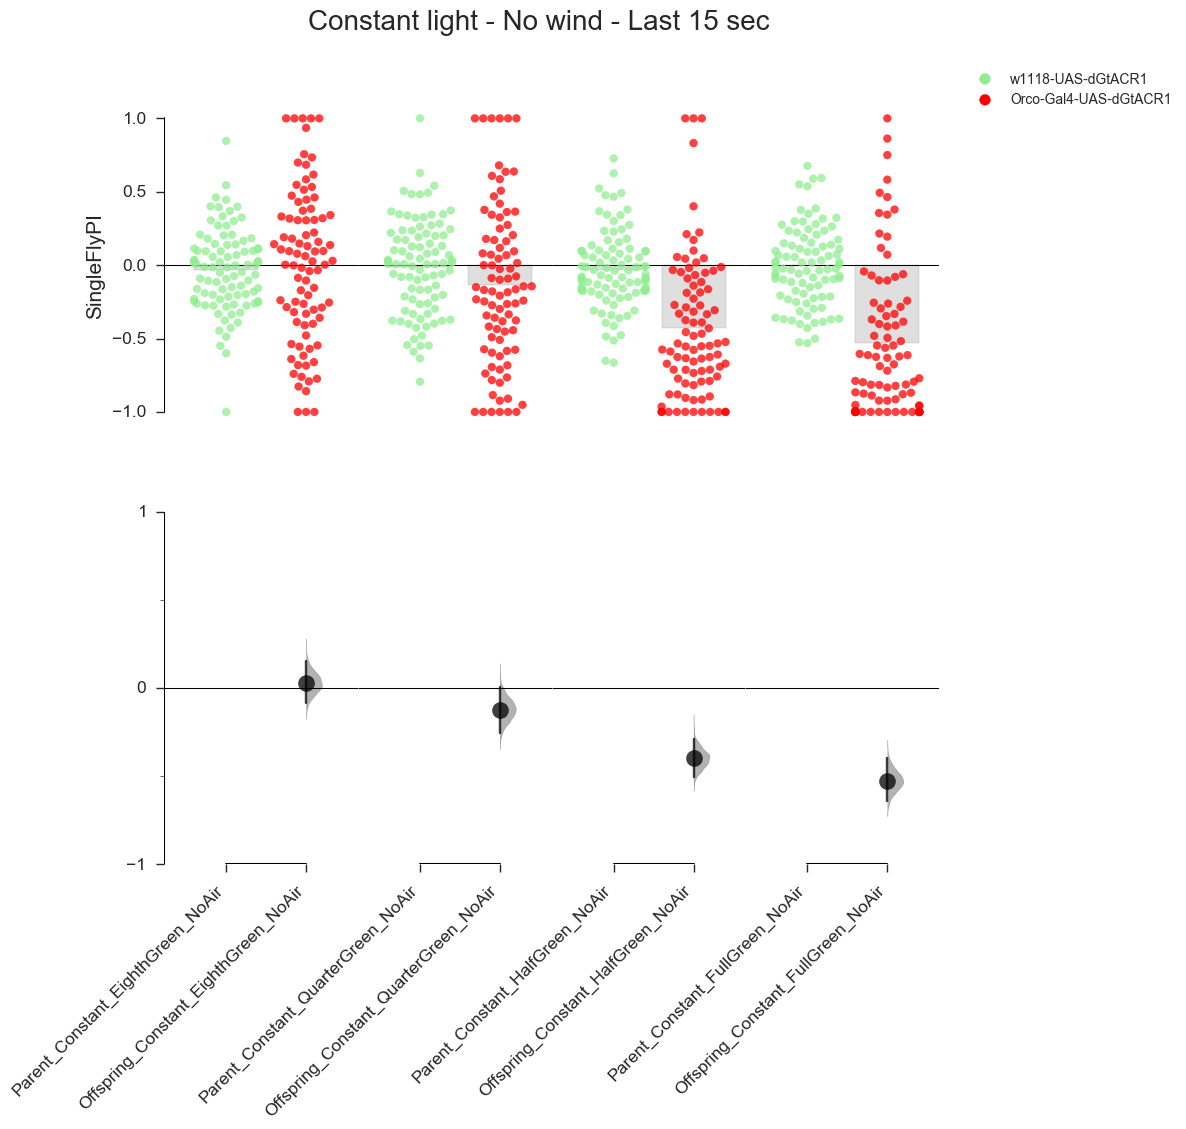

In [45]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_EighthGreen_NoAir','Offspring_Constant_EighthGreen_NoAir'),                                        
                                        ('Parent_Constant_QuarterGreen_NoAir','Offspring_Constant_QuarterGreen_NoAir'),
                                        ('Parent_Constant_HalfGreen_NoAir','Offspring_Constant_HalfGreen_NoAir'),
                                        ('Parent_Constant_FullGreen_NoAir','Offspring_Constant_FullGreen_NoAir'),
                                        
                                      
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,6,2):
    fig.axes[j].legend_.remove()

for k in range(0,8,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind - Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind - Upwind and Downwind combined - Last 15 sec

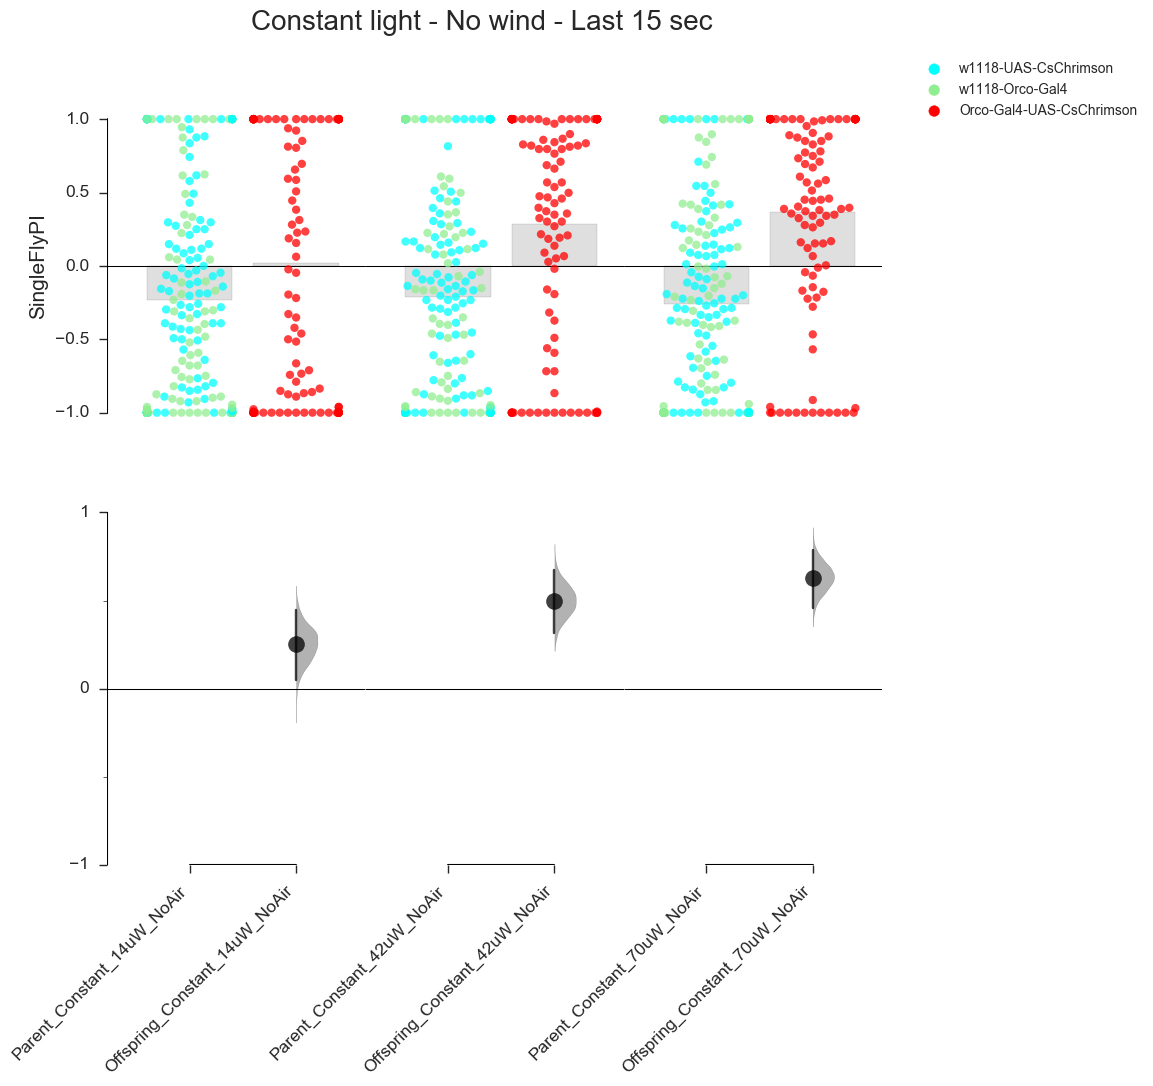

In [10]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),                                        
                                        
                                        
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),                                       
                                        
                                        
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind - Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind - UpWind - Last 15 sec

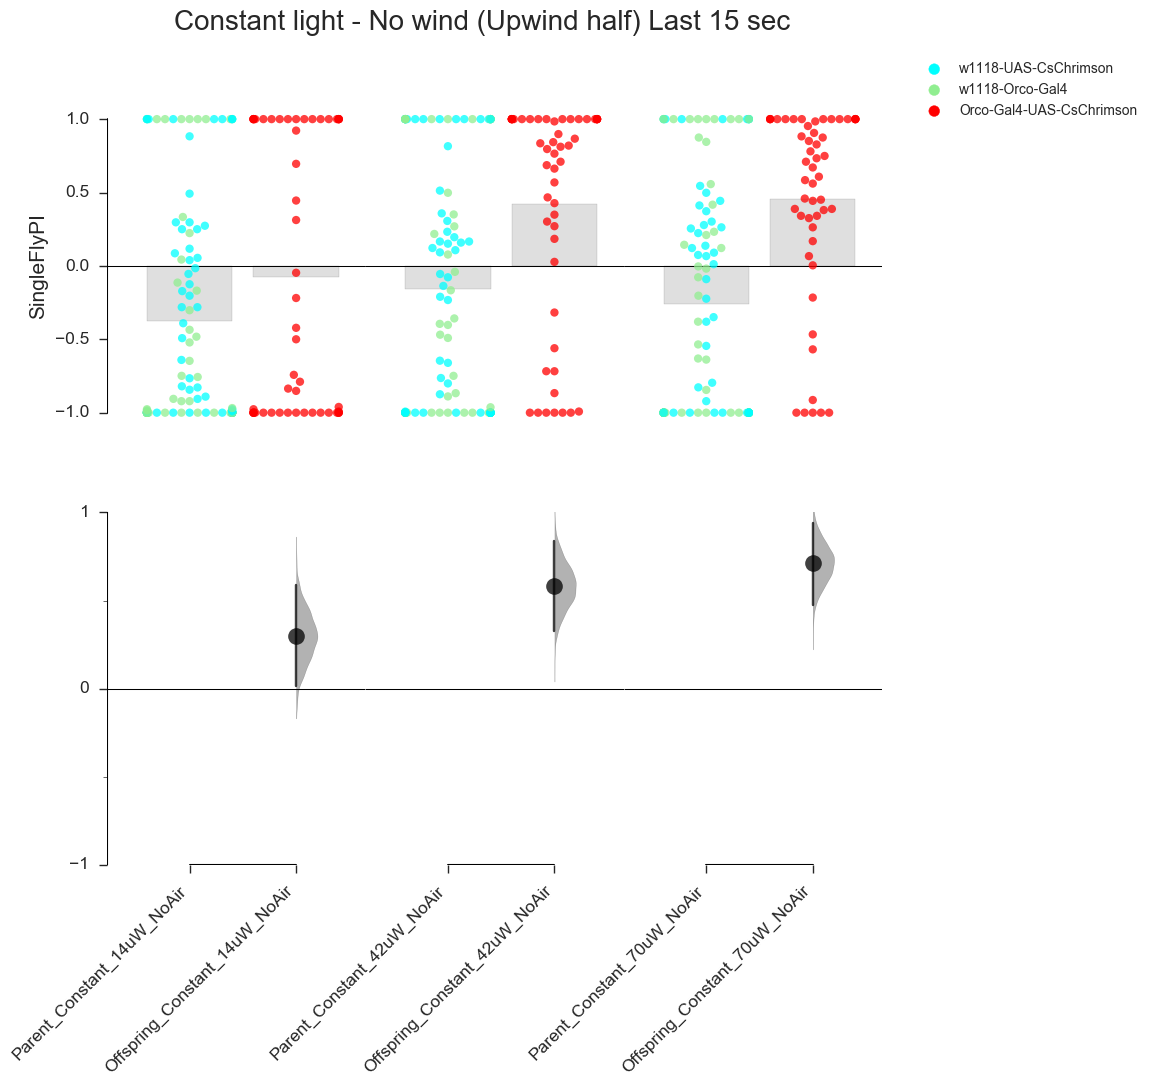

In [11]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind (Upwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind - DownWind - Last 15 sec

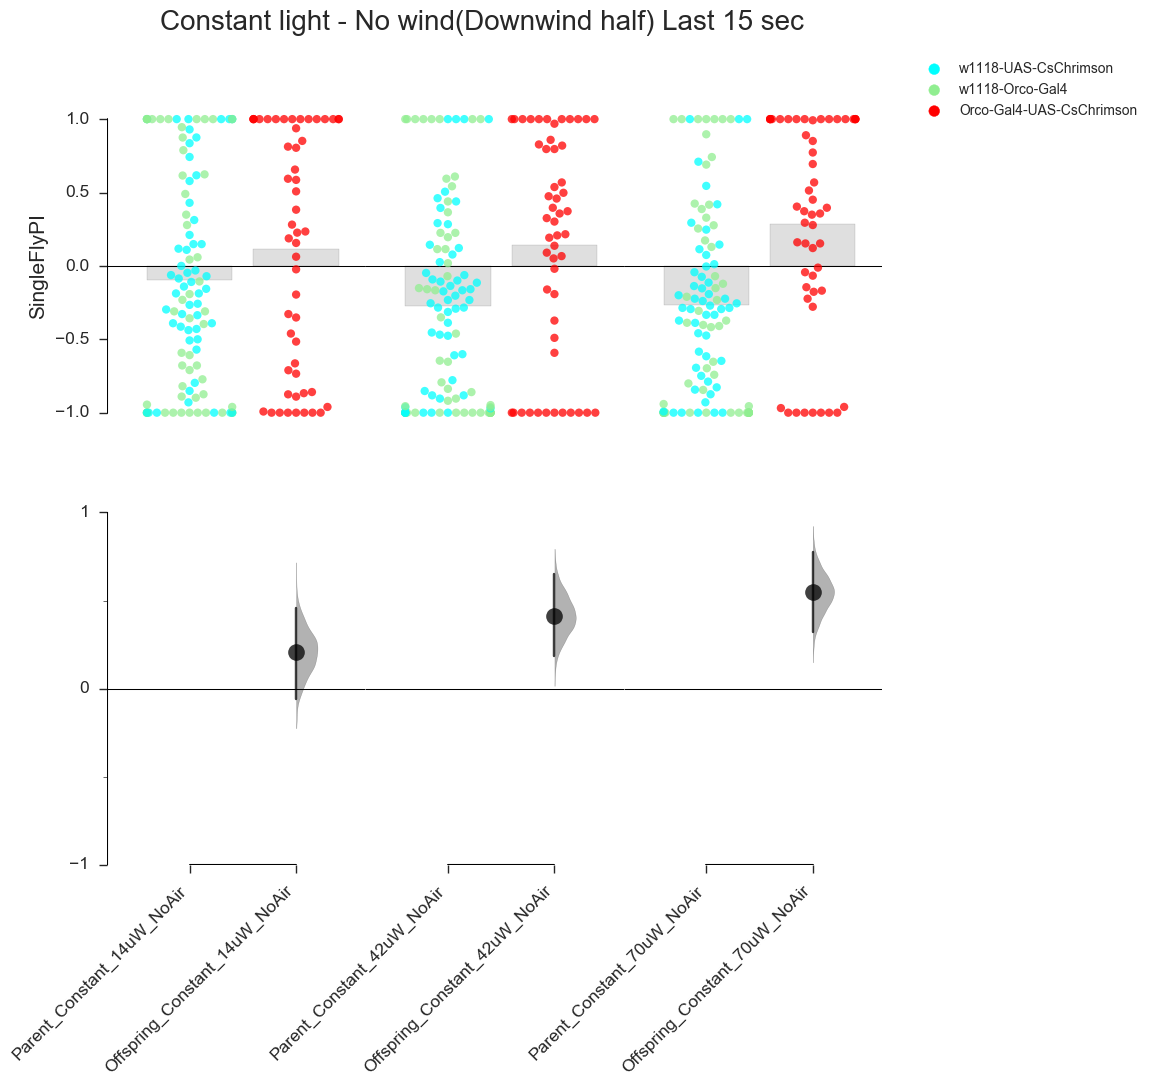

In [12]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind(Downwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind - Upwind and Downwind combined - Last 15 sec

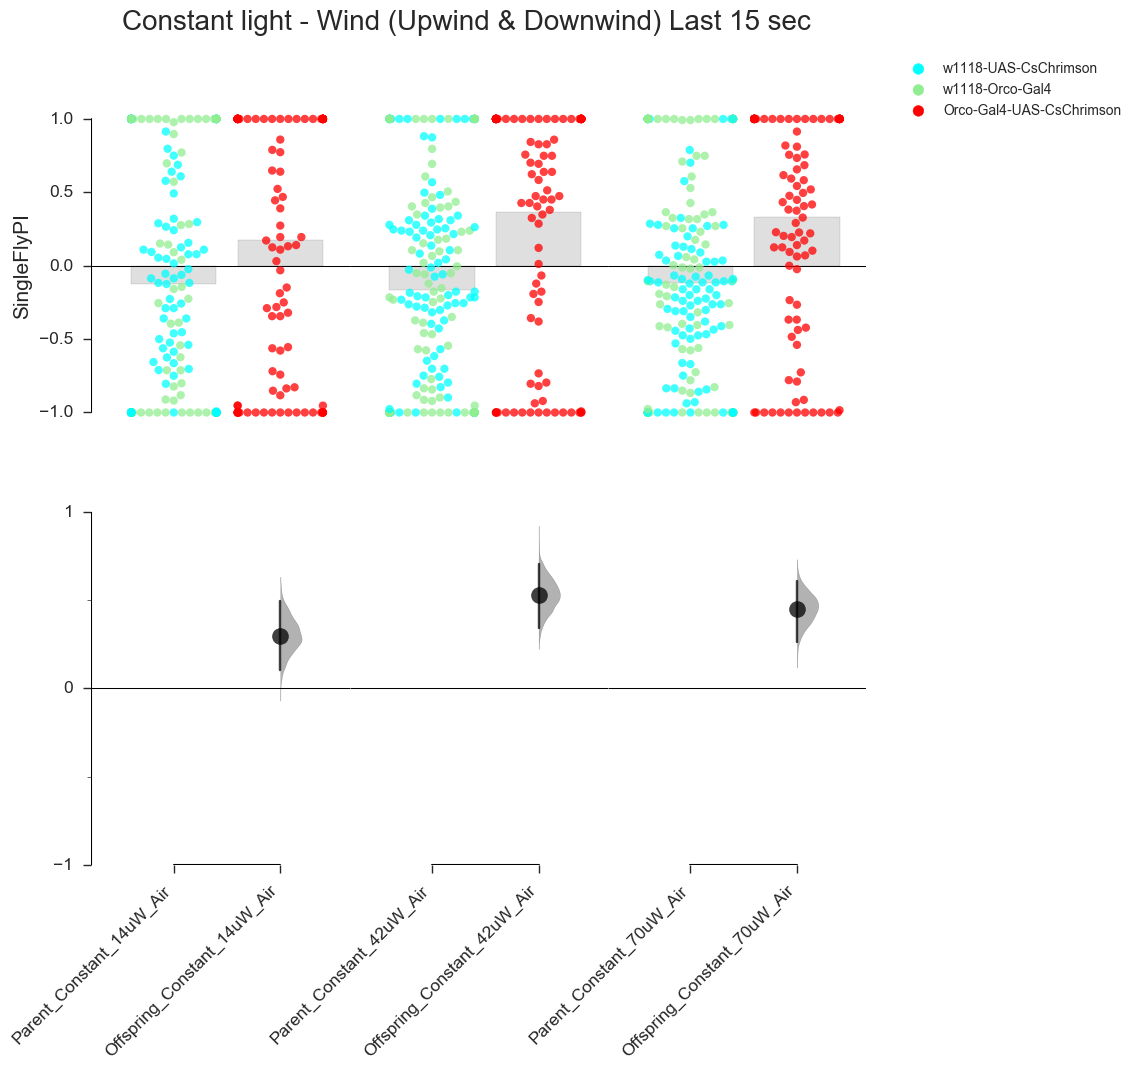

In [13]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                                                                                                       
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),                                                                              
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind (Upwind & Downwind) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind - Upwind - Last 15 sec

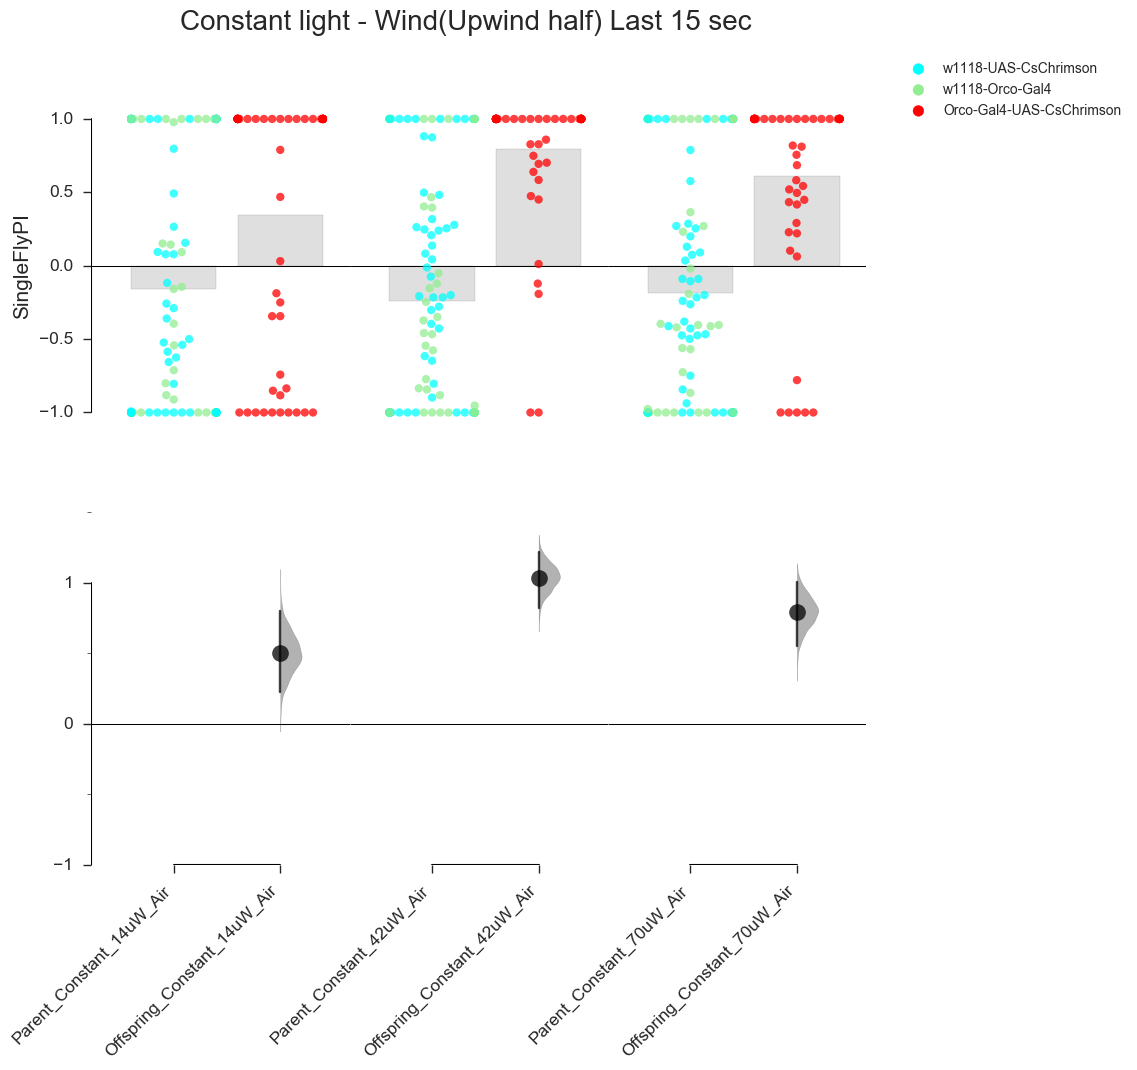

In [14]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                                                                                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),                                    
                                                                               
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1.5),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Upwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind - Downwind - Last 15 sec

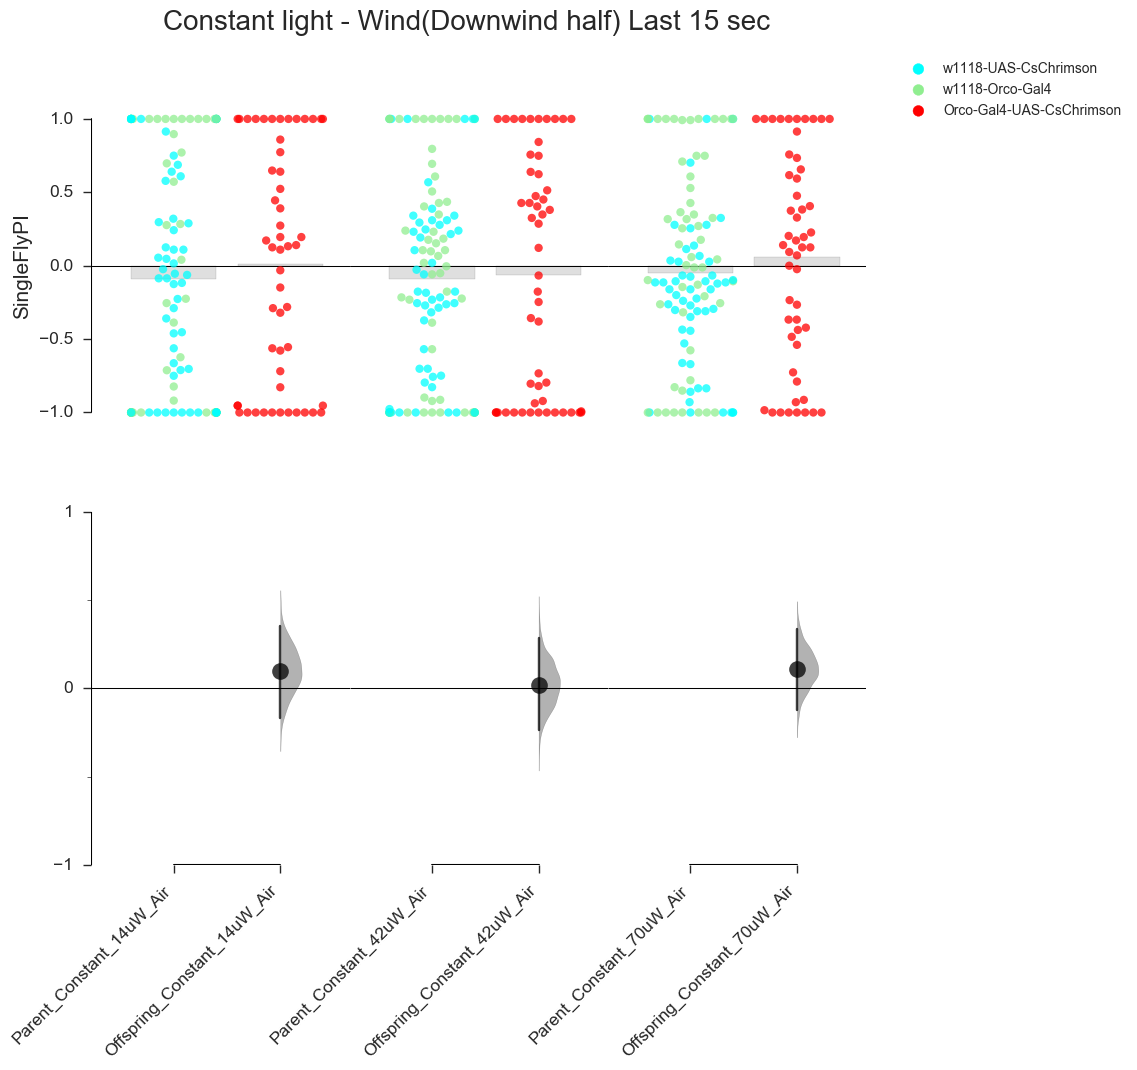

In [15]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),                                                                               
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),                                       
                                                                                
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Downwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

## Warning: you have to set the "lastXsec" variable to 30, and run the analysis cell again before starting to plot 30sec data!

### Constant Light - No Wind (Downwind and Upwind) Last 30 sec

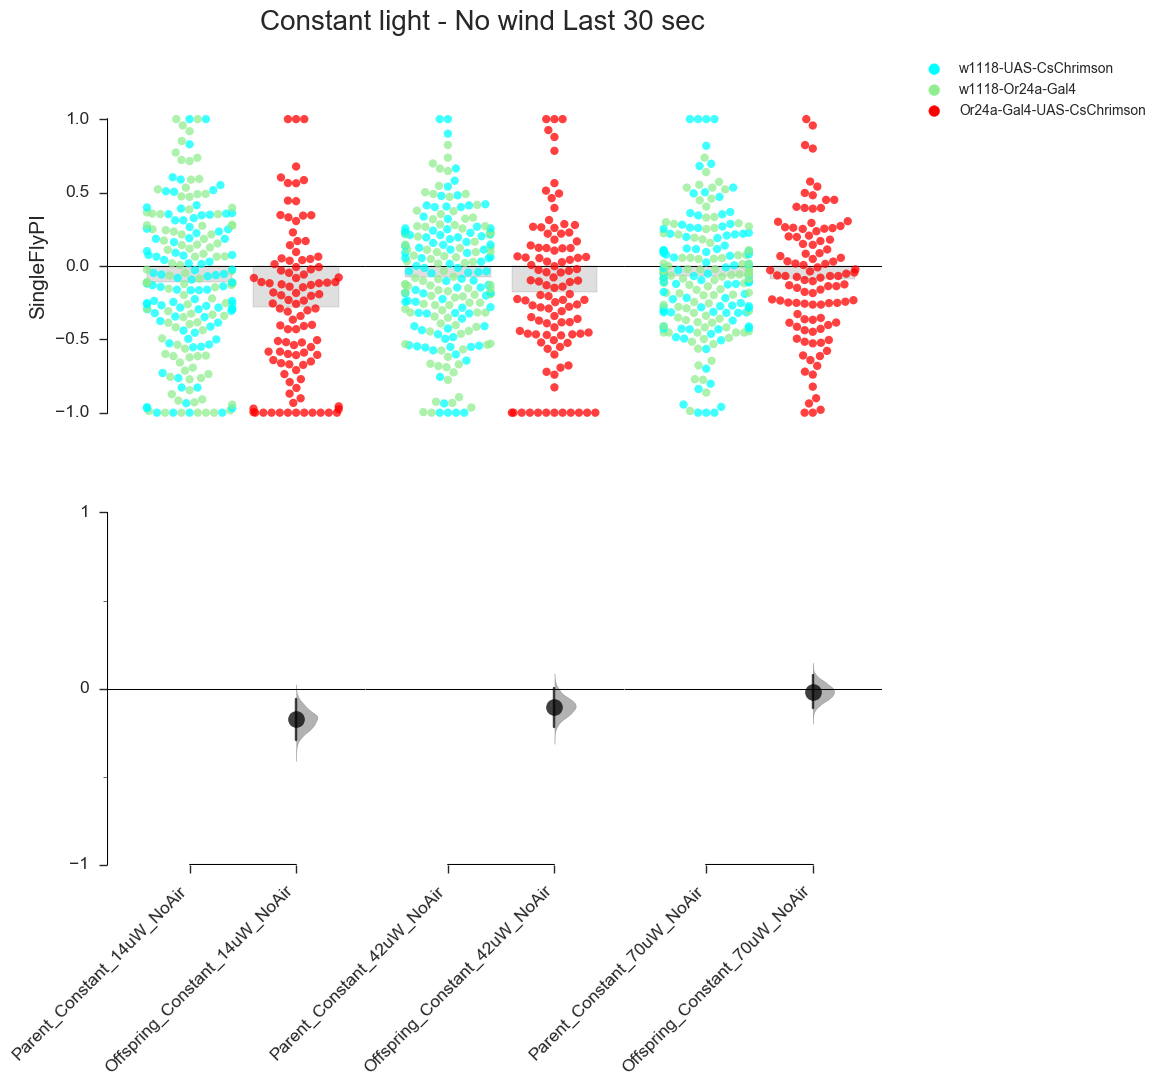

In [18]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                                                              
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                                                            
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind (Downwind half) Last 30 sec

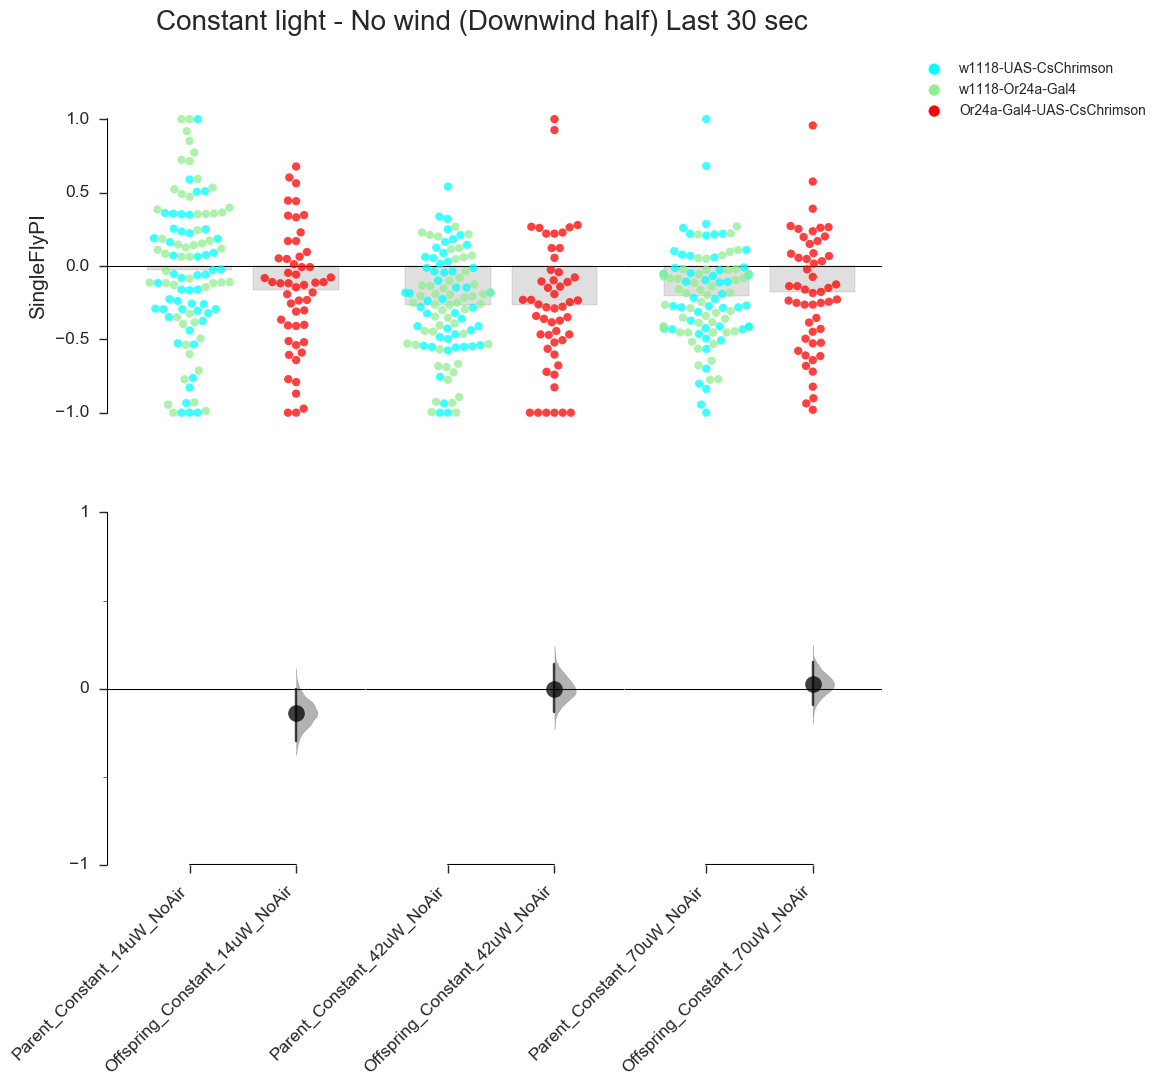

In [19]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                                                              
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                                                            
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind (Downwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind (Upwind half) Last 30 sec

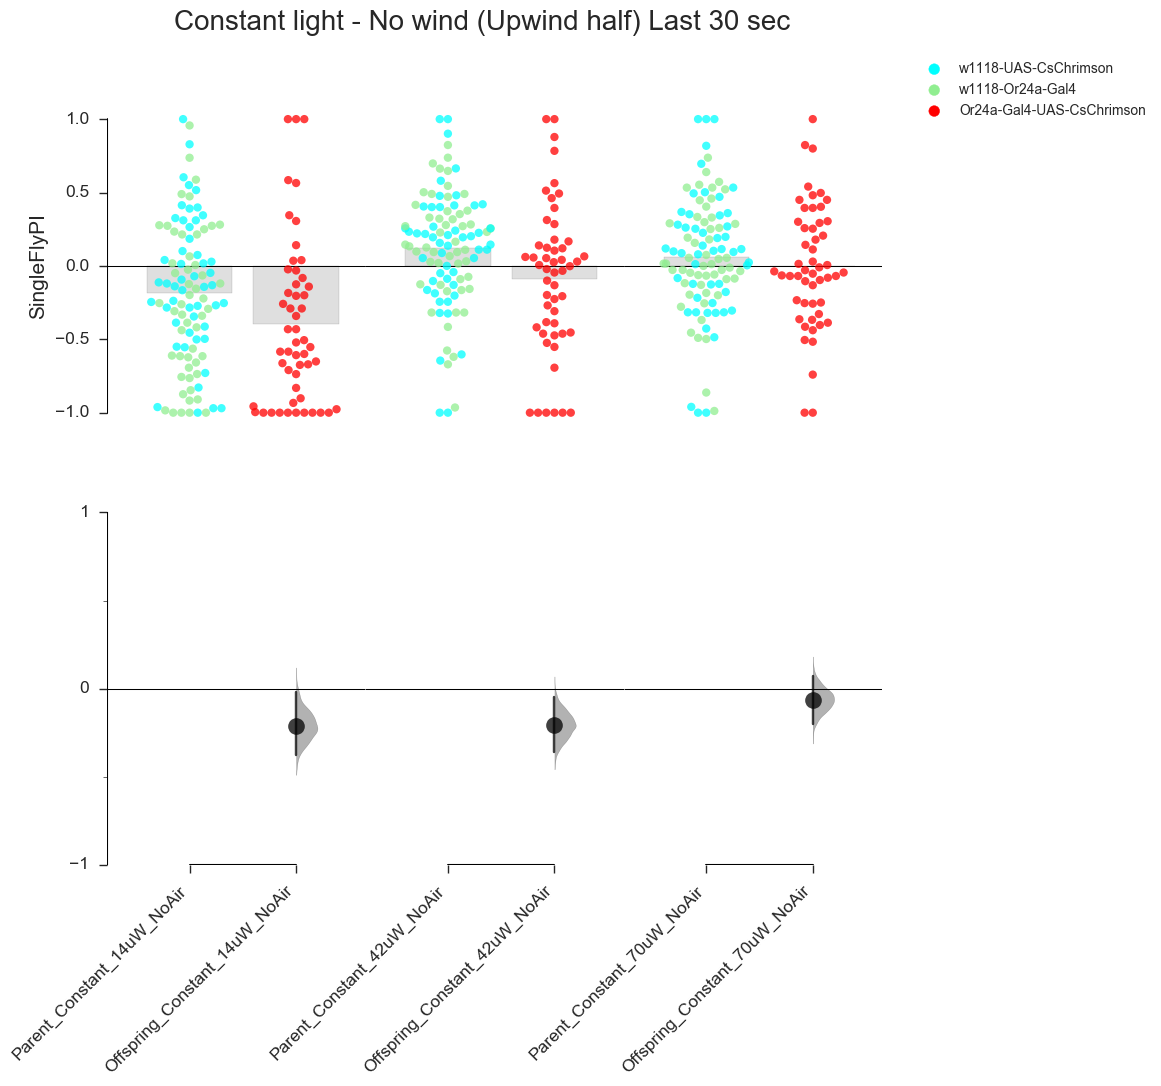

In [20]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                                                              
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                                                            
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind (Upwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind (Downwind and Upwind) Last 30 sec

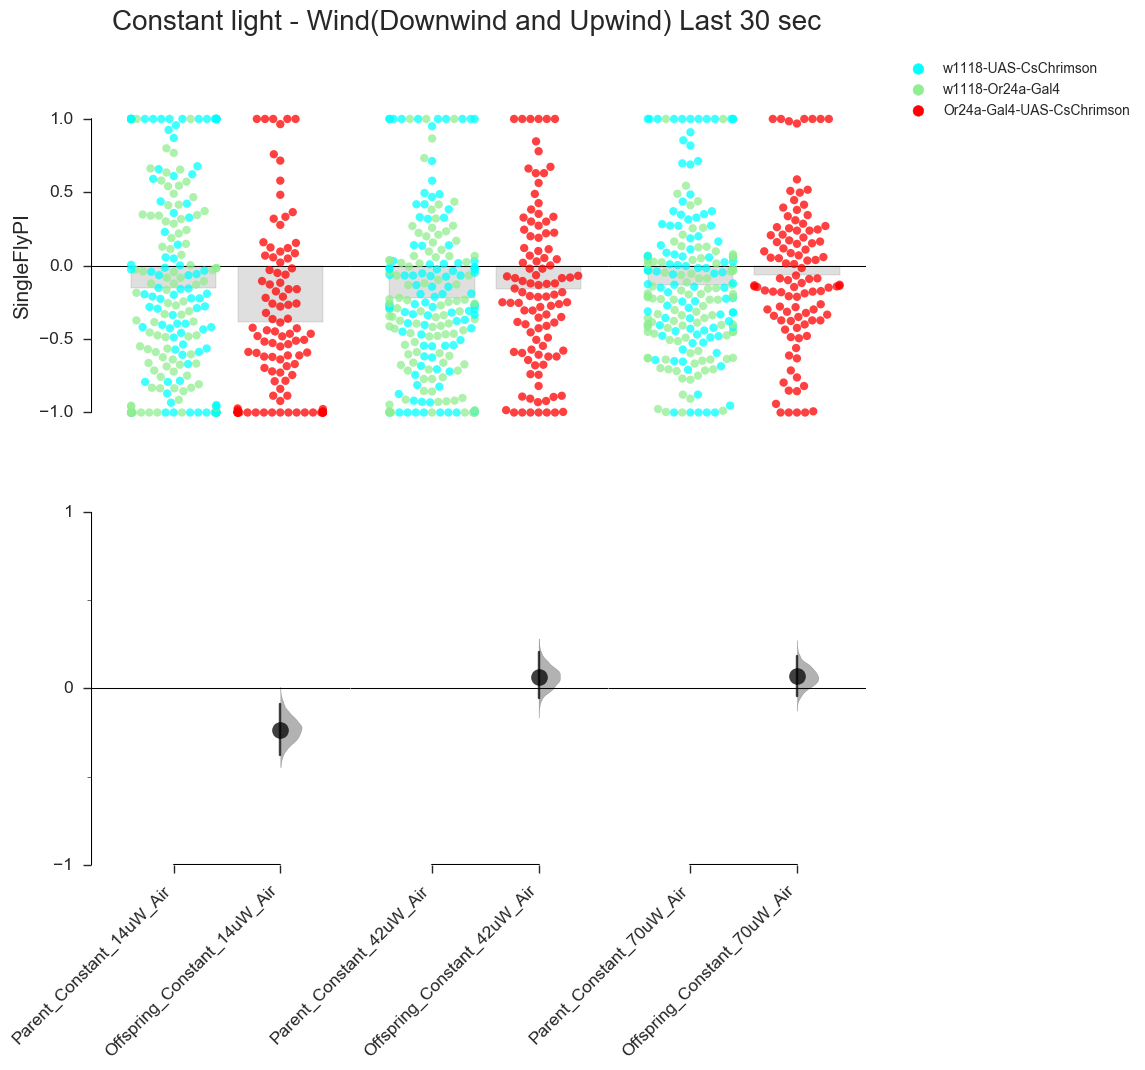

In [21]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Downwind and Upwind) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind (Downwind half) Last 30 sec

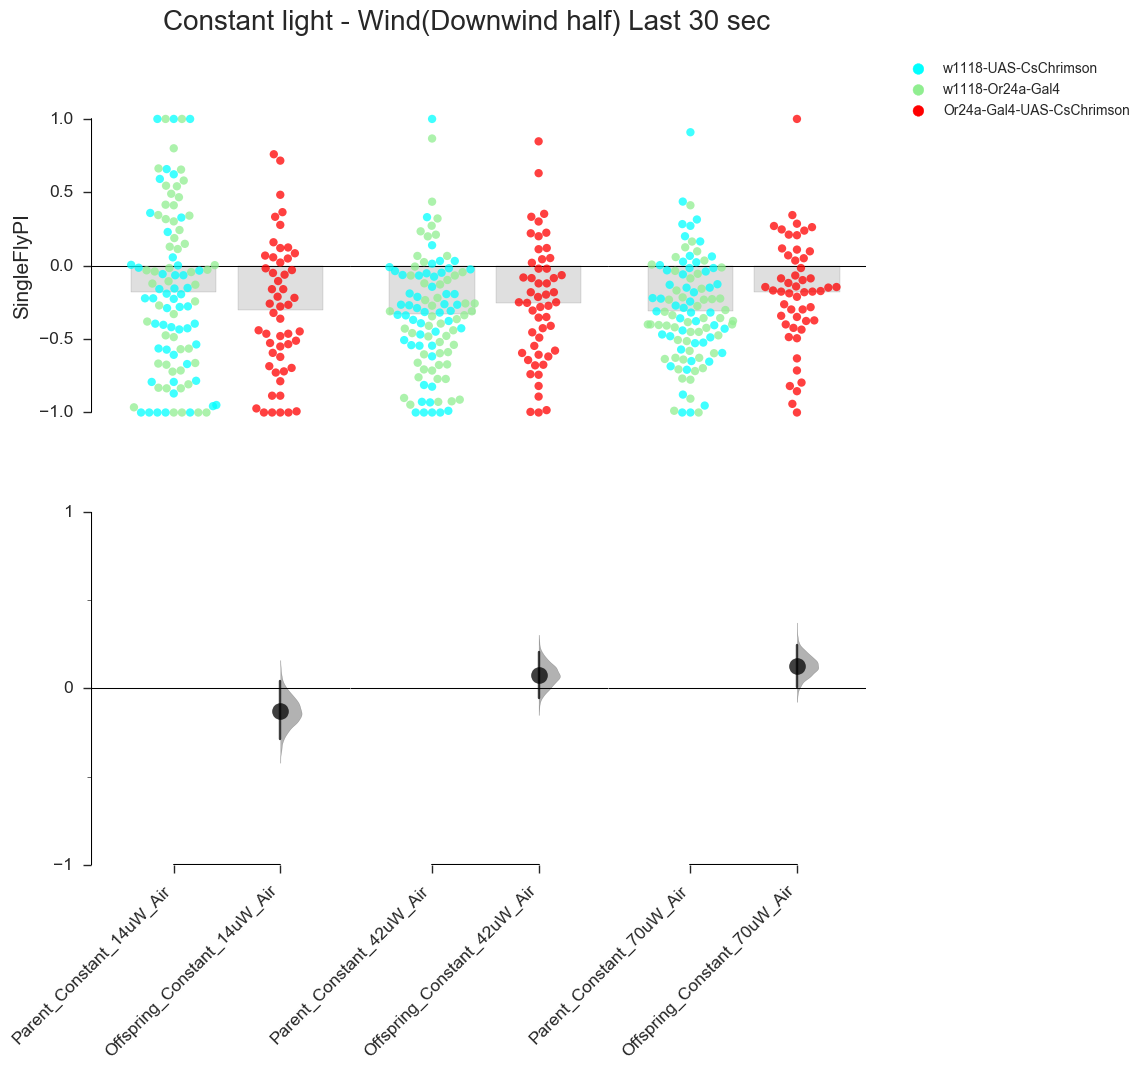

In [22]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Downwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind (Upwind half) Last 30 sec

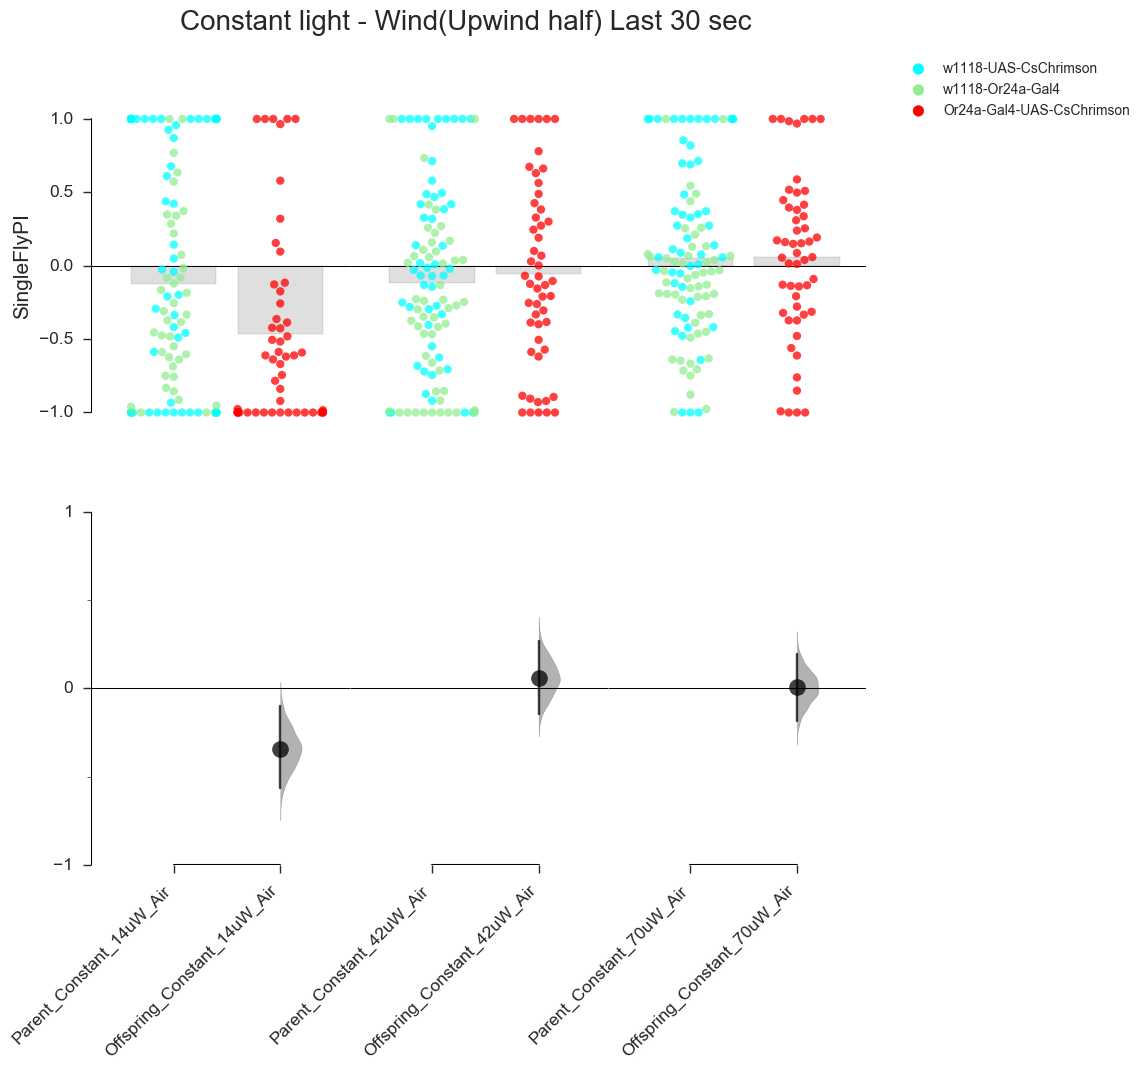

In [23]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Upwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

In [39]:
os.close()

TypeError: close() takes exactly 1 argument (0 given)